<a href="https://colab.research.google.com/github/Minhaz-04/Face-Detection/blob/main/Face_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Unpickling the data
import pickle

with open('/content/images.p','rb') as f:
  images = pickle.load(f)

with open('/content/labels.p','rb') as f:
  labels = pickle.load(f)

In [ ]:
print(images.shape)
print(labels.shape)

(394, 100, 100)
(394,)


In [ ]:
set(labels)

{'Minhaz', 'Rajeswari', 'Reshma', 'Rojalin'}

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels = le.fit_transform(labels)

In [ ]:
set(labels)

{0, 1, 2, 3}

In [ ]:
le.inverse_transform([0,1,2,3])

array(['Minhaz', 'Rajeswari', 'Reshma', 'Rojalin'], dtype='<U9')

In [ ]:
p = len(set(labels))
print('Total Number of Persons :',p )

Total Number of Persons : 4


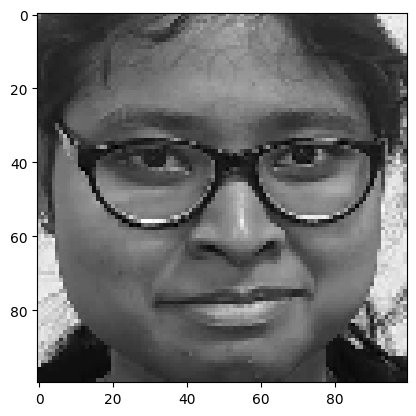

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(images[125],cmap='gray')
plt.show()

In [ ]:
import cv2

In [ ]:
import numpy as np

In [ ]:
def preprocessing(img):
  img = cv2.equalizeHist(img)
  img = img.reshape(100,100,1)
  img = img/255
  return img

In [ ]:
images = np.array(list(map(preprocessing,images)))
print('Shape of Input Data : ',images.shape)

Shape of Input Data :  (394, 100, 100, 1)


In [ ]:
from keras.utils import to_categorical
labels = to_categorical(labels)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from keras.optimizers import Adam

In [ ]:
#Model Training
def Lenet_Model():
  model = Sequential()
  #Convolutional & ReLU Layer
  model.add(Conv2D(30,(5,5),input_shape=(100,100,1),activation='relu'))
  #Pooling Layer
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(15,(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  #Flatten or Input Layer
  model.add(Flatten())
  #Hidden Layer
  model.add(Dense(100,activation='relu'))
  model.add(Dense(50,activation='relu'))
  #Output Layer
  model.add(Dense(p,activation='softmax'))
  model.compile(Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
  return model

In [ ]:
model = Lenet_Model()
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 96, 96, 30)          │             780 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 48, 48, 30)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 46, 46, 15)          │           4,065 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 23, 23, 15)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 7935)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         793,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │             204 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 803,699 (3.07 MB)

 Trainable params: 803,699 (3.07 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
h = model.fit(images,labels,epochs=10,validation_split=0.1)

Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 388ms/step - accuracy: 1.0000 - loss: 1.7836e-07 - val_accuracy: 1.0000 - val_loss: 1.5862e-05
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 298ms/step - accuracy: 1.0000 - loss: 4.5592e-07 - val_accuracy: 1.0000 - val_loss: 1.4212e-05
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 354ms/step - accuracy: 1.0000 - loss: 2.2251e-07 - val_accuracy: 1.0000 - val_loss: 1.3136e-05
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 310ms/step - accuracy: 1.0000 - loss: 4.0286e-07 - val_accuracy: 1.0000 - val_loss: 1.2058e-05
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 310ms/step - accuracy: 1.0000 - loss: 6.5541e-08 - val_accuracy: 1.0000 - val_loss: 1.1584e-05
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 468ms/step - accuracy: 1.0000 - loss: 1.2316e-07 - val_accuracy: 1.0000 - val_loss: 1.0870e-05
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 300ms/step - accuracy: 1.0000 - loss: 1.4077e-07 - val_accuracy: 1.0000 - val_loss: 1.0271e-05
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 455ms/s

In [ ]:
model.save('final_model.h5')